## Homework 5
### Theory Part

**[Q1]** Consider the following 3 × 3 filter.

$$ w = \begin{bmatrix}
        -3 & 0 & 3 \\
        -4 & 0 & 4 \\
        -3 & 0 & 3 
       \end{bmatrix} $$
       
This filter w is applied to a grayscale image shown in Figure 1. 

![figure1](Capture.JPG)

Assume that the dimension the image in Figure 1 is way larger than 3 × 3. We can express the image in terms of matrix M, each element is numbered between 0 to 1 (0 being completely black and 1 being completely white). We are applying convolution of the filter w to $M : (M ∗ w)$. Answer the following questions,

---

**1) For which part of the image will the filter return a number thats furthest possible from
zero (very positive or very negative)? (ignore the arrow and the words, thats for the next
question) Give a max of 3 sentences explanation.**

ANSWER: Furthest possible from zero means that the left side (which will have negative weight) will be closest to 0, while the right side (with positive weight) will be the closest to 1, or the other way around. In this case, the left side and right side of the circle is the furthest from zero, left side having negative number and right side having positive.

**2) Will the convolution output at the location indicated in Figure 1 be positive, negative, or
zero in value? Give a max of 3 sentences explanation.**

ANSWER: It will be zero in value. The location pointed have the same color from left to right, hence the left column will cancel the right column, resulting in 0 output.

---

**[Q2]** Figure 2 illustrates the before and after effect of a blurring filter when applied on a greyscale
image. 

![figure2](Capture2.JPG)


Blurring is an operation that makes strong edges weaker by some kind of averaging. Black
pixels take a value of 0 and white pixes take a value of 1. Assume that the blurring effect is done
using the following 5 by 5 filters with stride 1, and there’s enough zero padding on the image
before processing so that the filter will fit on the edges.
Determine whether each of the filters below can or cannot give a blurring effect and give your
reason in not more than 2 sentences :



1) $ \frac{1}{10} \begin{bmatrix}
                    0 & 0 & 0 & 0 & 0\\
                    0 & 0 & 1 & 0 & 0 \\
                    0 & 1 & -4 & 1 & 0 \\
                    0 & 0 & 1 & 0 & 0 \\
                    0 & 0 & 0 & 0 & 0
                   \end{bmatrix}$ ANSWER: will not give blurring effect, as it takes the difference between a pixel and for neighbouring pixels (not averaging).
                   
2) $ \frac{1}{4} \begin{bmatrix}
                    0 & 0 & 0 & 0 & 0 \\
                    0 & 0 & 0 & 0 & 0 \\
                    0 & 0 & 1 & 1 & 0 \\
                    0 & 0 & 1 & 1 & 0 \\
                    0 & 0 & 0 & 0 & 0 \\
                 \end{bmatrix}$ ANSWER: will give blurring effect, as it averages the pixel with the pixel on the right and below it.
                 
3) $ \begin{bmatrix}
                    0 & 5 & 0 & 5 & 0 \\
                    0 & 2 & 0 & 2 & 0 \\
                    0 & 0 & 0 & 0 & 0 \\
                    0 & -2 & 0 & -2 & 0 \\
                    0 & -5 & 0 & -5 & 0 \\
                 \end{bmatrix}$ ANSWER: will not give blurring effect; positive weight on top and negative weight below detects edges.
                 
4) $ \frac{1}{150} \begin{bmatrix}
                    3 & 4 & 8 & 4 & 3 \\
                    4 & 7 & 9 & 7 & 4 \\
                    8 & 9 & 10 & 9 & 8 \\
                    4 & 7 & 9 & 7 & 4 \\
                    3 & 4 & 8 & 4 & 3 \\
                 \end{bmatrix}$ ANSWER: will give blurring effect; it takes all neighbouring pixel in some proportion. Looks like gaussian blurring.


**[Q3]** Does the following neural networks suffer strongly from the vanishing gradient problem?
Give your reason in not more than 2 sentences.

1. **1-Layer Feed-Foward NN**: _very few layers & backprop; **does not suffer from vanishing gradient**._
2. **Very Deep Feed-Forward NN**: _lots of layers, backprop depends very much on the next layer's gradient; **suffers greatly from vanishing gradient.**_
3. **Recurrent NN**: _lots of gradient terms due to many time steps; **suffers greatly from vanishing gradient**._
4. **LSTM NN**:_**does not suffer from vanishing gradient**_
5. **ResNet**:_has shortcuts for some nodes to skip a few layer, hence **does not suffer from vanishing gradient**._


### Coding Part

Image being used (gudboi):


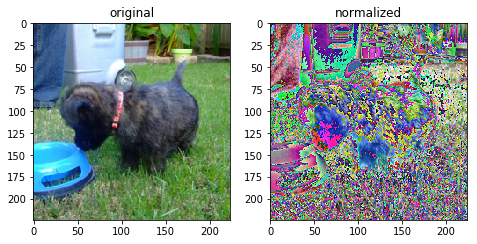

In [1]:
from hw5_code import *
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 10] # make figures bigger

gudboi = Image.open('gudboi.jpg')
gudboi_norm = model_transform(gudboi)

# showing images
plt.figure()
gudboi_nimg = transforms.ToPILImage()(gudboi_norm)
gudboi_back = inv_transform(gudboi_norm)

plt.subplot(131)
plt.imshow(gudboi_back)
plt.title('original')

plt.subplot(132)
plt.imshow(gudboi_nimg)
plt.title('normalized')

print('Image being used (gudboi):')

In [2]:
'''
Using Resnet
'''
gudboi_t = gudboi_norm.view(1, 3, 224, 224).cuda()
resnet = get_trained_resnet()
resnet.eval()

# get initial class
output = resnet(gudboi_t)
_, pred = output.max(dim=1)
print('predicted class:', pred.item(), get_descript(pred.item()))

predicted class: 233 Bouvier des Flandres, Bouviers des Flandres


In [3]:
# randomize target class, just because 
# (or set to 414 backpack, 293 cheetah)
target_class = np.random.randint(1000) 
print('Target class:', target_class, get_descript(target_class))

Target class: 708 pedestal, plinth, footstall


In [4]:
'''
Improved Net Deceiver
'''
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable

# gudboi_t = gudboi_norm.view(1, 3, 224, 224).cuda()
# gudboi_v = Variable(gudboi_t, requires_grad=True)
# optimizer = optim.SGD([gudboi_v], lr=fool_rate)
# criterion = nn.CrossEntropyLoss()

def fool_model(model, image, target_class, maxiter=1000, fool_rate=0.1, improved=False):
    image_tensor = image.view(1, 3, 224, 224).cuda()
    image_var = Variable(image_tensor, requires_grad=True)
    
    optimizer = optim.SGD([image_var], lr=fool_rate)
    criterion = nn.CrossEntropyLoss()
    
    for i in range(maxiter):
    #     print('iteration',i,'..', end='\r')

        # forward pass
        resnet.eval()
        output = resnet(image_var)
        _, pred = output.max(dim=1)

        if i % 1 == 0:
            print(i,'   current prediction:', pred.item(), get_descript(pred.item()))

        if pred == target_class:
            print('Ha! Fooled')
            break

        # ascending gradient
        resnet.zero_grad()
        class_loss = -output[0, target_class]
        class_loss.backward() # calling backward fill the .grad with the supposed gradient
        
        # mess with .grad for algo improvement
        if improved:
            # get temp x
            image_var_temp = image_var.clone()
            image_var_temp -= image_var.grad
            
            # check for border condition
            ivt = np.array(inv_transform(image_var_temp.view(3, 224, 224).cpu().detach()))
            ivt_lower = (ivt >= 2)
            ivt_upper = (ivt <= 253)
            ivt_mask = np.logical_and(ivt_lower, ivt_upper)#.float().cuda()
            
            # change gradients to 0 for bad pixel
            before_grad = image_var.grad.clone()
            ivt_masktens = torch.tensor(ivt_mask.astype(float))\
                                .transpose(0, 2).float().cuda().view([1,3,224,224])
            image_var.grad *= ivt_masktens
            
            print('            [blocked grad', (1-ivt_masktens).sum().item(), 
                  '] [sum changed', (before_grad - image_var.grad).sum().item(), ']')
        
        optimizer.step() # calling .step() updates the variables with its current .grad
        
        
    return image_var


In [5]:
# iterate until pred = target
gudboi_norm = model_transform(gudboi)
gudboi_v = fool_model(resnet, gudboi_norm, target_class)
gv = inv_transform(gudboi_v.view(3,224,224).cpu().detach())

print('\nWith improved:')
gudboi_norm = model_transform(gudboi)
gudboi_v = fool_model(resnet, gudboi_norm, target_class, improved=True)
gv_ = inv_transform(gudboi_v.view(3,224,224).cpu().detach())

0    current prediction: 182 Border terrier
1    current prediction: 192 cairn, cairn terrier
2    current prediction: 192 cairn, cairn terrier
3    current prediction: 233 Bouvier des Flandres, Bouviers des Flandres
4    current prediction: 233 Bouvier des Flandres, Bouviers des Flandres
5    current prediction: 233 Bouvier des Flandres, Bouviers des Flandres
6    current prediction: 233 Bouvier des Flandres, Bouviers des Flandres
7    current prediction: 233 Bouvier des Flandres, Bouviers des Flandres
8    current prediction: 708 pedestal, plinth, footstall
Ha! Fooled

With improved:
0    current prediction: 182 Border terrier
            [blocked grad 883.0 ] [sum changed -0.016638167202472687 ]
1    current prediction: 192 cairn, cairn terrier
            [blocked grad 1121.0 ] [sum changed 0.25442060828208923 ]
2    current prediction: 192 cairn, cairn terrier
            [blocked grad 1326.0 ] [sum changed -0.5346593856811523 ]
3    current prediction: 233 Bouvier des Flandres, B

Image being used (gudboi):


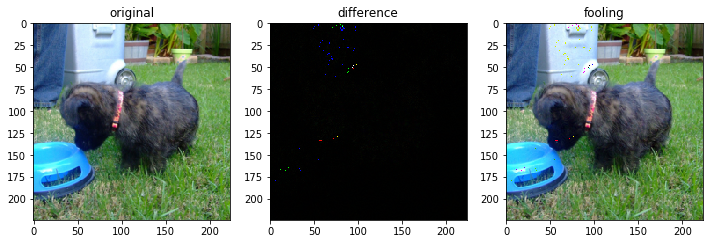

In [6]:
# showing images
import PIL.ImageChops as ImChop
plt.rcParams['figure.figsize'] = [12, 10] # make figures bigger

newboi_vi = gudboi_v.view(3,224,224).cpu().detach()
newboi_nimg = transforms.ToPILImage()(newboi_vi)
newboi_back = inv_transform(newboi_vi)

plt.figure()
plt.subplot(131)
plt.imshow(gudboi_back)
plt.title('original')

boi_diff = ImChop.difference(newboi_back, gudboi_back)
plt.subplot(132)
plt.imshow(boi_diff)
plt.title('difference')

plt.subplot(133)
plt.imshow(newboi_back)
plt.title('fooling')


print('Image being used (gudboi):')

In [7]:
mrshout = Image.open('mrshout.jpg')
mrshout_norm = model_transform(mrshout)
mrshout_t = mrshout_norm.view(1, 3, 224, 224).cuda()

# get initial class
output = resnet(mrshout_t)
_, pred = output.max(dim=1)
print('predicted class:', pred.item(), get_descript(pred.item()))

predicted class: 850 teddy, teddy bear


In [8]:
target_class = 949 # strawberry

newshout_v = fool_model(resnet, mrshout_norm, target_class)

0    current prediction: 850 teddy, teddy bear
1    current prediction: 850 teddy, teddy bear
2    current prediction: 850 teddy, teddy bear
3    current prediction: 850 teddy, teddy bear
4    current prediction: 850 teddy, teddy bear
5    current prediction: 850 teddy, teddy bear
6    current prediction: 850 teddy, teddy bear
7    current prediction: 850 teddy, teddy bear
8    current prediction: 949 strawberry
Ha! Fooled


Image being used (mrshout):


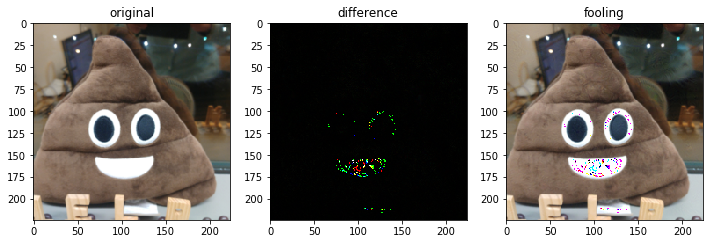

In [9]:
mrshout_back = inv_transform(mrshout_norm)
plt.rcParams['figure.figsize'] = [12, 10] # make figures bigger

newshout_vi = newshout_v.view(3,224,224).cpu().detach()
newshout_back = inv_transform(newshout_vi)

plt.figure()
plt.subplot(131)
plt.imshow(mrshout_back)
plt.title('original')

boi_diff = ImChop.difference(newshout_back, mrshout_back)
plt.subplot(132)
plt.imshow(boi_diff)
plt.title('difference')

plt.subplot(133)
plt.imshow(newshout_back)
plt.title('fooling')


print('Image being used (mrshout):')

In [10]:
output = resnet(newshout_v)
_, pred = output.max(dim=1)
print('predicted class:', pred.item(), get_descript(pred.item()))

predicted class: 949 strawberry
